# Generate NIS curves from the theoretical fitting

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyusadel import UsadelProblem, thermal_broadening, trivial_diffops
from tqdm.notebook import tqdm

In [2]:
def add_label(ax, text, position="tl", color=[1, 1, 1, 0.90]):
    if position == "tl":
        ax.text(
            0.03,
            0.96,
            text,
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=8,
            transform=ax.transAxes,
            bbox=dict(boxstyle="square", facecolor=color, linewidth=0, pad=0.20),
        )
    elif position == "tr":
        ax.text(
            0.65,
            0.96,
            text,
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=8,
            transform=ax.transAxes,
            bbox=dict(boxstyle="square", facecolor=color, linewidth=0, pad=0.20),
        )
    elif position == "bl":
        ax.text(
            0.03,
            0.1,
            text,
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=8,
            transform=ax.transAxes,
            bbox=dict(boxstyle="square", facecolor=color, linewidth=0, pad=0.20),
        )
    elif position == "br":
        ax.text(
            0.65,
            0.1,
            text,
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=8,
            transform=ax.transAxes,
            bbox=dict(boxstyle="square", facecolor=color, linewidth=0, pad=0.20),
        )
    else:
        pass

In [3]:
k_B = 86.17e-6

In [4]:
# Input
map_file_url = "../exp_data/NIS_data/MDC004.Sample1/16.dat"
fit_result_url = "fitting_results/MDC004_Sample1_RunID_16_lockin6_M_fit.csv"
# Output
fit_map_data_url = fit_result_url.split(".")[0] + "_map.csv"
fit_map_imag_url = fit_result_url.split(".")[0] + "_map.png"

# Load data

In [5]:
# Import the dataset
data = pd.read_table(map_file_url)
data

,magnet_bpar,v_bias,lockin_6_CondX
0,-0.2,-0.00100,0.165643
1,-0.2,-0.00099,0.165704
2,-0.2,-0.00098,0.165674
3,-0.2,-0.00097,0.165735
4,-0.2,-0.00096,0.165796
...,...,...,...
40396,0.2,0.00096,0.165827
40397,0.2,0.00097,0.166104
40398,0.2,0.00098,0.166566
40399,0.2,0.00099,0.166843


In [6]:
# Extract the data from the dataset
b_N = data["magnet_bpar"].value_counts()[0]
v_N = data["v_bias"].value_counts()[0]

b = data["magnet_bpar"].to_numpy().reshape((b_N, v_N)) * 1e3
_v = data["v_bias"].to_numpy().reshape((b_N, v_N)) * 1e3

g = data["lockin_6_CondX"].to_numpy().reshape((b_N, v_N))

b_ax = b[:, 0]
_v_ax = _v[0, :]

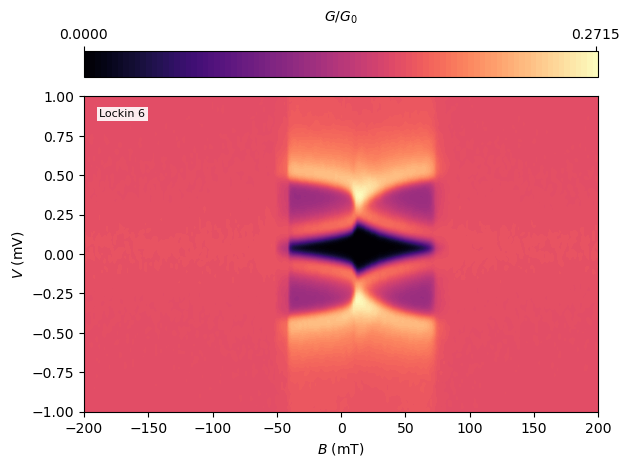

In [7]:
# Plot the data
fig, (ax1) = plt.subplots()
im1 = ax1.contourf(b, _v, g, levels=100, cmap="magma")
add_label(ax1, "Lockin 6")
cbar1 = plt.colorbar(im1, ax=ax1, location="top")
cbar1.set_ticks([0, g.max()])

ax1.set_ylabel(r"$V$ (mV)")
ax1.set_xlabel(r"$B$ (mT)")
cbar1.set_label(r"$G/G_0$")

fig.tight_layout()

# Compensation of the voltage offset

In [9]:
# RunID_15, RunID_16
v_offset = +0.042

# RunID_39, RunID_40
# v_offset = -0.054

# RunID_96, RunID_97
# v_offset = +0.038

# RunID_28, RunID_29
# v_offset = +0.056

In [10]:
v_ax = _v_ax - v_offset
v = _v - v_offset

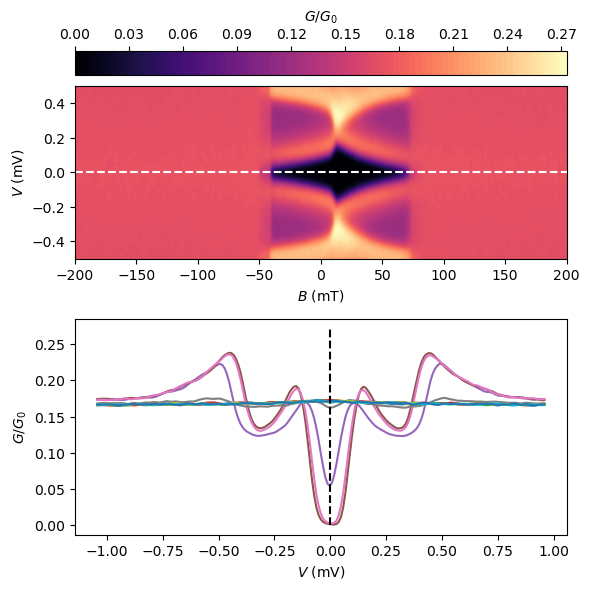

In [11]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 6))
im1 = ax1.contourf(b, v, g, levels=100, cmap="magma")
cbar = plt.colorbar(im1, ax=ax1, location="top")

ax1.hlines([0], -200, 200, "w", linestyles="--")
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlabel(r"$B$ (mT)")
ax1.set_ylabel(r"$V$ (mV)")
cbar.set_label(r"$G/G_0$")

ax2.plot(v_ax, g[0:b_N:20].T)
ax2.vlines([0], -0, g.max(), "k", linestyles="--")
ax2.set_xlabel(r"$V$ (mV)")
ax2.set_ylabel(r"$G/G_0$")

fig.tight_layout()

# Loading

In [12]:
popt_df = pd.read_csv(fit_result_url)

In [13]:
popt_df

,B,Delta,h,Sigma_D_D,Sigma_D_h,Sigma_h_h,tau_sf_inv,tau_so_inv,x_N,G_N,Sigma_GN,Gamma,Sigma_Gamma,T
0,-200.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.001632,0.169459,0.001621,0.00001,0.0,0.003447
1,-198.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.008351,0.169459,0.001621,0.00001,0.0,0.003447
2,-196.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.006898,0.169459,0.001621,0.00001,0.0,0.003447
3,-194.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.010530,0.169459,0.001621,0.00001,0.0,0.003447
4,-192.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.003812,0.169459,0.001621,0.00001,0.0,0.003447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,192.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.009440,0.169459,0.001621,0.00001,0.0,0.003447
197,194.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,0.997093,0.169459,0.001621,0.00001,0.0,0.003447
198,196.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.009440,0.169459,0.001621,0.00001,0.0,0.003447
199,198.0,0.0,0.0,0.0,0.0,0.0,0.045625,0.010806,1.008533,0.169459,0.001621,0.00001,0.0,0.003447


In [14]:
B = popt_df["B"].to_numpy()
Delta = popt_df["Delta"].to_numpy()
h = popt_df["h"].to_numpy()
tau_sf_inv = popt_df["tau_sf_inv"].to_numpy()
tau_so_inv = popt_df["tau_so_inv"].to_numpy()
# Sigma_DD = popt_df["Sigma_DD"].to_numpy()
# Sigma_Dh = popt_df["Sigma_Dh"].to_numpy()
# Sigma_Dt = popt_df["Sigma_Dt"].to_numpy()
# Sigma_hh = popt_df["Sigma_hh"].to_numpy()
# Sigma_ht = popt_df["Sigma_ht"].to_numpy()
# Sigma_tt = popt_df["Sigma_tt"].to_numpy()
x_N = popt_df["x_N"].to_numpy()
Gamma = popt_df["Gamma"].to_numpy()
T = popt_df["T"].to_numpy()
G_N = popt_df["G_N"].to_numpy()

In [15]:
e_N = 601
dos_map = np.zeros((b_N, e_N))
dos_map[:, :] = G_N[0]

In [16]:
idx_start = np.argwhere(h != 0).min()
idx_end = np.argwhere(h != 0).max()

In [17]:
for idx in tqdm(range(idx_start, idx_end)):
    up = UsadelProblem(
        Nsites=1,
        diff_ops=trivial_diffops(),
        h_x=np.array([0.0]) + h[idx],
        h_y=np.array([0.0]),
        h_z=np.array([0.0]),
        tau_sf_inv=np.array([0.0]) + tau_sf_inv[idx],
        tau_so_inv=np.array([0.0]) + tau_so_inv[idx],
        D=0,
        T=T,
        Gamma=Gamma[idx],
    )

    up.Delta = Delta[idx]

    up.set_real_omega_ax(-2.1, 2.1, e_N)
    up.solve_spectral()

    dos_map[idx] = thermal_broadening(
        up.get_omega_ax_r(),
        G_N[idx] * ((1 - x_N[idx]) * up.get_ldos()[:, 0] + x_N[idx]),
        T[idx],
    )

  0%|          | 0/63 [00:00<?, ?it/s]

In [18]:
e_ax = np.linspace(-2.1, 2.1, e_N)
b_th, e_th = np.meshgrid(b_ax, e_ax, indexing="ij")

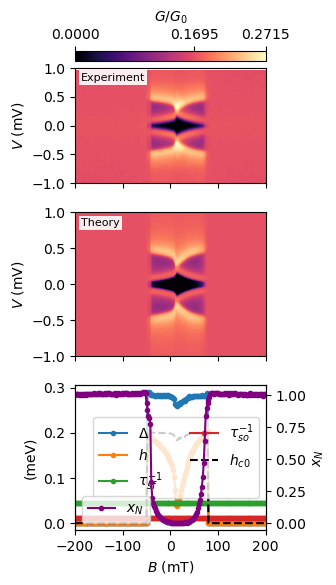

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(3.375, 6))

levels = np.linspace(np.min(g), np.max(g), 100)

im1 = ax1.contourf(b, v, g, levels=levels, cmap="magma")
ax1.set_ylim(-1, 1)
ax1.set_ylabel(r"$V$ (mV)")

im2 = ax2.contourf(b_th, e_th, dos_map, levels=levels, cmap="magma")
ax2.set_ylim(-1, 1)
ax2.set_ylabel(r"$V$ (mV)")

cbar = fig.colorbar(im1, ax=ax1, location="top")
cbar.set_ticks([0, G_N[0], np.max(g)])
cbar.set_label(r"$G/G_0$")

ax3.plot(B, Delta, ".-", label=r"$\Delta$")
ax3.plot(B, h, ".-", label=r"$h$")
ax3.plot(B, tau_sf_inv, ".-", label=r"$\tau_{sf}^{-1}$")
ax3.plot(B, tau_so_inv, ".-", label=r"$\tau_{so}^{-1}$")
ax3.plot(b_ax, Delta / np.sqrt(2), "--k", label=r"$h_{c0}$")

ax3.set_xlabel(r"$B$ (mT)")
ax3.set_ylabel(r"(meV)")

ax3.legend(ncol=2)

ax3b = ax3.twinx()
ax3b.plot(b_ax, x_N, ".-", color="purple", label=r"$x_N$")
ax3b.legend()
ax3b.set_ylabel(r"$x_N$")

add_label(ax1, "Experiment")
add_label(ax2, "Theory")

fig.tight_layout()

# fig.savefig(fit_map_imag_url)

In [20]:
output_df = pd.DataFrame(
    data=dict(b=b_th.flatten(), e=e_th.flatten(), g=dos_map.flatten())
)
# output_df.to_csv(fit_map_data_url)